## Analysis on A/B test data for an online store to increase conversion

**Task and Goal:**

Here, we are going to scrutinize and process the given datasets. The purpose is to test changes related to the introduction of an improved recommendation system and to come up with comprehensible and handy information for the online store that will help to gain success.  It is expected that within 14 days of signing up, users will show better conversion (at least a 10% increase) into each of the stage of the funnel. So, initially, we aim at finding the internal connection between different columns or categories of the given datasets.

We will consider the following steps in our whole process and analysis:


-  <a href='#the_destination1'>General Information</a>


-  <a href='#the_destination2'>Data preprocessing and Changing Data types</a>


-  <a href='#the_destination3'>Study, Check and Analysis of the Data Including Event Funnel</a>


-  <a href='#the_destination4'>Testing Hypothesis and Study the results of the A/B Test</a>


-  <a href='#the_destination5'>Report and Conclusion</a>


<a id='the_destination1'></a>
###  Opening the data file, extracting the general information and preparing for analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import plotly.graph_objects as go
import math
import plotly.express as px
import scipy.stats as stats

In [2]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [3]:
try:
    mark_data = pd.read_csv("datasets/ab_project_marketing_events_us.csv")
    user_data = pd.read_csv("datasets/final_ab_new_users_upd_us.csv")
    event_data = pd.read_csv("datasets/final_ab_events_upd_us.csv")
    part_data = pd.read_csv("datasets/final_ab_participants_upd_us.csv")
except:
    mark_data = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")
    user_data = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")
    event_data = pd.read_csv("/datasets/final_ab_events_upd_us.csv")
    part_data = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

In [4]:
print('marketing data:')
print()
mark_data.info()
display(mark_data.head())
print()


marketing data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null object
finish_dt    14 non-null object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [5]:
print('user data:')
print()
user_data.info()
display(user_data.head())
print()


user data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
user_id       58703 non-null object
first_date    58703 non-null object
region        58703 non-null object
device        58703 non-null object
dtypes: object(4)
memory usage: 1.8+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [6]:
print('event data:')
print()
event_data.info()
display(event_data.head())
print()


event data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
user_id       423761 non-null object
event_dt      423761 non-null object
event_name    423761 non-null object
details       60314 non-null float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [7]:
print('paricipants data:')
print()
part_data.info()
display(part_data.head())

paricipants data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
user_id    14525 non-null object
group      14525 non-null object
ab_test    14525 non-null object
dtypes: object(3)
memory usage: 340.6+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


<a id='the_destination2'></a>
### Data preprocessing and Changing Data types

**Checking missing values and duplicates**

In [8]:
# To check missing values
print(mark_data.isnull().sum())
print(user_data.isnull().sum())
print(event_data.isnull().sum())
print(part_data.isnull().sum())

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
user_id       0
first_date    0
region        0
device        0
dtype: int64
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64
user_id    0
group      0
ab_test    0
dtype: int64


In [9]:
print("There are in total ", event_data['event_name'].value_counts()['purchase'] , "times 'purchases' in 'event_name' column of 'event_data' data frame.")

There are in total  60314 times 'purchases' in 'event_name' column of 'event_data' data frame.


In [10]:
# To fill the missing values of 'details' column with  0
event_data['details']=event_data['details'].fillna(0)

In [11]:
# To check if there are duplicates in given data frames

print(mark_data.duplicated().sum())

print(user_data.duplicated().sum())

print(event_data.duplicated().sum())

print(part_data.duplicated().sum())

0
0
0
0


In [12]:
# To show duplicates for all columns of part_data simultaneously
display(part_data[part_data[part_data.columns.to_list()].duplicated() == True]) 

,user_id,group,ab_test


**Data type replacement**

In [13]:
# To convert the data type of mark_data DataFrame into datetime format
mark_data['start_dt'] = mark_data['start_dt'].astype('datetime64[ns]') 
mark_data['finish_dt'] = mark_data['finish_dt'].astype('datetime64[ns]') 

# To convert the data type of user_data DataFrame into datetime and category type
user_data['region'] = user_data['region'].astype('category')
user_data['device'] = user_data['device'].astype('category')
user_data['first_date'] = user_data['first_date'].astype('datetime64[ns]') 

# To convert the data type of event_data DataFrame into datetime and category and float type
event_data['event_dt'] = event_data['event_dt'].astype('datetime64[ns]') 
event_data['event_name'] = event_data['event_name'].astype('category')
event_data['details'] = event_data['details'].astype('float64')

# To convert the data type of part_data DataFrame into category type
part_data['group'] = part_data['group'].astype('category')
part_data['ab_test'] = part_data['ab_test'].astype('category')

# Add a new column to store date from event_dt column of event_data DataFrame and then convert its type
event_data['event_date']= event_data['event_dt'].dt.date
event_data['event_date'] = event_data['event_date'].astype('datetime64[ns]') 

In [14]:
event_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 5 columns):
user_id       423761 non-null object
event_dt      423761 non-null datetime64[ns]
event_name    423761 non-null category
details       423761 non-null float64
event_date    423761 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(1), object(1)
memory usage: 13.3+ MB


<a id='the_destination3'></a>
### Study, Check and Analysis of the Data Including Event Funnel

**Finding users who participated in both test:**

Now, we will find out the user who who participated in both test (recommender_system_test and interface_eu_test) and then, will show the user who participated in any one of two tests. 
- Indeed, we need to consider the users who participated in only one test.

In [15]:
counting_ab_test = part_data.groupby('user_id').agg({'ab_test': 'nunique'}) # list of user with number of belonging ab_test categ.
include_2 = counting_ab_test[counting_ab_test['ab_test'] == 2] # user who participated in both test:
print("users who participated in both test:")
print()
display(include_2)
print()

include_1 = counting_ab_test[counting_ab_test['ab_test'] == 1] # user those who participated in one test (either recommender_system_test or interface_eu_test):
print("user who participated in one test (either recommender_system_test or interface_eu_test):")
print()
display(include_1)

users who participated in both test:



,ab_test
user_id,
001064FEAAB631A1,2
00341D8401F0F665,2
0082295A41A867B5,2
00E68F103C66C1F7,2
00EFA157F7B6E1C4,2
...,...
FEA0C585A53E7027,2
FEC0BCA6C323872F,2
FF2174A1AA0EAD20,2



user who participated in one test (either recommender_system_test or interface_eu_test):



,ab_test
user_id,
0002CE61FF2C4011,1
0010A1C096941592,1
001E72F50D1C48FA,1
002412F1EB3F6E38,1
002540BE89C930FB,1
...,...
FFE5B14BD55C1C5C,1
FFE600EEC4BA7685,1
FFE7FC140521F5F6,1


In [16]:
# Considering the users who participated in one test (either recommender_system_test or interface_eu_test):
filt_part_data = part_data[part_data['user_id'].isin(include_1.index)]

#filt_part_data = part_data.reset_index()
display(filt_part_data.head())

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test


**Finding users those are in both groups:**

Now, we will find out the user who are in both group of A and B and then, will show the user who are only in any one group of A and B.
- Indeed, we need to consider the user who are only in one group.

In [17]:
counting_group = filt_part_data.groupby('user_id').agg({'group': 'nunique'}) # list of user with number of belonging groups
include_2 = counting_group[counting_group['group'] == 2] # user those are  in both group of A and B
print("user those are  in both group of A and B:")
print()
display(include_2)
print()

include_1 = counting_group[counting_group['group'] == 1] # user those are only in any 1 group (either A or B)
print("user those are only in any 1 group (either A or B):")
print()
display(include_1)

user those are  in both group of A and B:



,group
user_id,



user those are only in any 1 group (either A or B):



,group
user_id,
0002CE61FF2C4011,1
0010A1C096941592,1
001E72F50D1C48FA,1
002412F1EB3F6E38,1
002540BE89C930FB,1
...,...
FFE5B14BD55C1C5C,1
FFE600EEC4BA7685,1
FFE7FC140521F5F6,1


In [18]:
# Considering the users who are only in one group (either in A or in B)
filt_part_data = filt_part_data[filt_part_data['user_id'].isin(include_1.index)]
filt_part_data = filt_part_data.reset_index()
display(filt_part_data.head())

,index,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,4,4FF2998A348C484F,A,recommender_system_test
3,5,7473E0943673C09E,A,recommender_system_test
4,6,C46FE336D240A054,A,recommender_system_test


**Considering the users who paticipated in "recommender_system_test":**

In [19]:
# Considering the users who paticipated in "recommender_system_test"
filt_part_data = filt_part_data.query(' ab_test == "recommender_system_test" ')
display(filt_part_data.head())

,index,user_id,group,ab_test
0,0,D1ABA3E2887B6A73,A,recommender_system_test
1,1,A7A3664BD6242119,A,recommender_system_test
2,4,4FF2998A348C484F,A,recommender_system_test
3,5,7473E0943673C09E,A,recommender_system_test
4,6,C46FE336D240A054,A,recommender_system_test


In [20]:
print(event_data['event_date'].min())
print(event_data['event_date'].max())

2020-12-07 00:00:00
2020-12-30 00:00:00


In [21]:
print("starting date for first_date column of user_data DataFrame: ", user_data['first_date'].min())
print("Ending date for first_date column of user_data DataFrame: ", user_data['first_date'].max())

starting date for first_date column of user_data DataFrame:  2020-12-07 00:00:00
Ending date for first_date column of user_data DataFrame:  2020-12-23 00:00:00


**filtering users data in terms of first date:**

In [22]:
# filtering user_data in terms of first_date since on 2020-12-21 they stopped taking up new users
user_data = user_data.query(' first_date >= "2020-12-07" and first_date<= "2020-12-21" ')
display(user_data.head())

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [23]:
# To merge the event_data dataframe and user_data data frame
event_user_data = pd.merge(event_data, user_data, how= 'left', on = 'user_id')
display(event_user_data.head())

,user_id,event_dt,event_name,details,event_date,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,2020-12-07,EU,Android


In [24]:
# Initially we add a seperate column to show the difference of days of signing up and event date
event_user_data['difference'] = (event_user_data['event_date'] - event_user_data['first_date']).dt.days

In [25]:
# filtering the data to consider only less than or equal to 14 days
event_user_data = event_user_data.query(' difference <=14 ')
display(event_user_data.sample(5))

,user_id,event_dt,event_name,details,event_date,first_date,region,device,difference
66638,E459CE9C1B1643BC,2020-12-10 10:13:16,product_cart,0.0,2020-12-10,2020-12-10,EU,PC,0.0
90931,0E4C7231A7414F3A,2020-12-18 09:44:10,product_cart,0.0,2020-12-18,2020-12-12,EU,PC,6.0
155135,7B1B0B8F93E01AA0,2020-12-14 05:56:25,product_page,0.0,2020-12-14,2020-12-12,EU,Android,2.0
412516,3244CA66292B190A,2020-12-27 11:43:28,login,0.0,2020-12-27,2020-12-17,N.America,Android,10.0
73513,8E902D5364430CED,2020-12-13 21:21:47,product_cart,0.0,2020-12-13,2020-12-13,EU,iPhone,0.0


In [26]:
# To merge the filt_part_data dataframe and event_user_data data frame
new_df = pd.merge(filt_part_data, event_user_data, how= 'left', on = 'user_id')
display(new_df.head())

,index,user_id,group,ab_test,event_dt,event_name,details,event_date,first_date,region,device,difference
0,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,2020-12-07,EU,PC,0.0
1,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,2020-12-07,EU,PC,0.0
2,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00,2020-12-07,2020-12-07,EU,PC,0.0
3,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00,2020-12-07,2020-12-07,EU,PC,0.0
4,1,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00,2020-12-20,2020-12-20,EU,iPhone,0.0


In [27]:
# To merge the filt_part_data dataframe and user_data data frame
filt_part_data = pd.merge(filt_part_data, user_data, how= 'left', on = 'user_id')
display(filt_part_data.head())

,index,user_id,group,ab_test,first_date,region,device
0,0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac
3,5,7473E0943673C09E,A,recommender_system_test,2020-12-16,EU,iPhone
4,6,C46FE336D240A054,A,recommender_system_test,2020-12-17,EU,iPhone


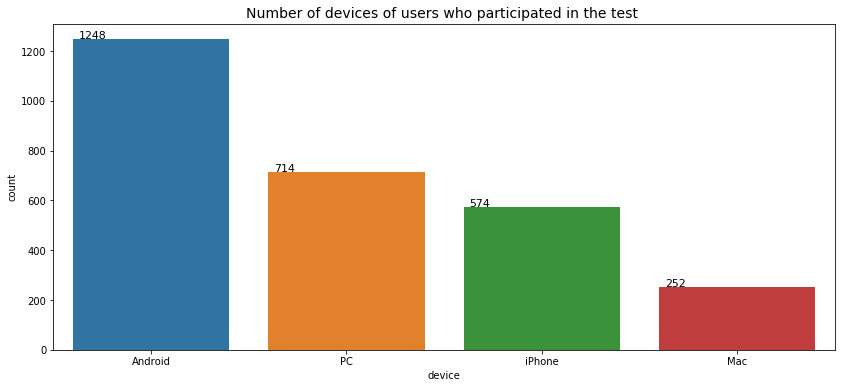

In [28]:
# To visualize the Number of users who participated in the test
plt.figure(figsize=(14,6))
plt.title('Number of devices of users who participated in the test ', fontsize=14)
d_order=['Android','PC','iPhone','Mac']
ax=sns.countplot(x='device',data=filt_part_data, order=d_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


In [29]:
filt_part_data1= filt_part_data.groupby(['group','device'])['device'].count().to_frame()
filt_part_data1.columns = [' '.join(col).strip() for col in filt_part_data1.columns.values]
filt_part_data1  = filt_part_data1.reset_index()
filt_part_data1.columns = ['group', 'device', 'number_of_devices']

display(filt_part_data1)

,group,device,number_of_devices
0,A,Android,916
1,A,Mac,192
2,A,PC,541
3,A,iPhone,433
4,B,Android,332
5,B,Mac,60
6,B,PC,173
7,B,iPhone,141


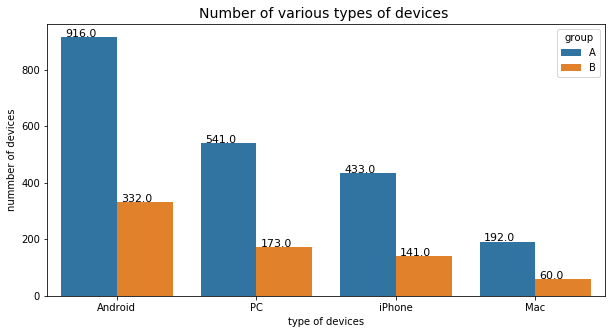

In [30]:
# plotting the number of the various types of establishments 
plt.figure(figsize=(10,5))
d_order=['Android','PC','iPhone','Mac']
ax = sns.barplot(x="device",y='number_of_devices', hue='group', data=filt_part_data1 ,order=d_order)

plt.title('Number of various types of devices ', size = 14)
plt.xlabel('type of devices')
plt.ylabel('nummber of devices')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


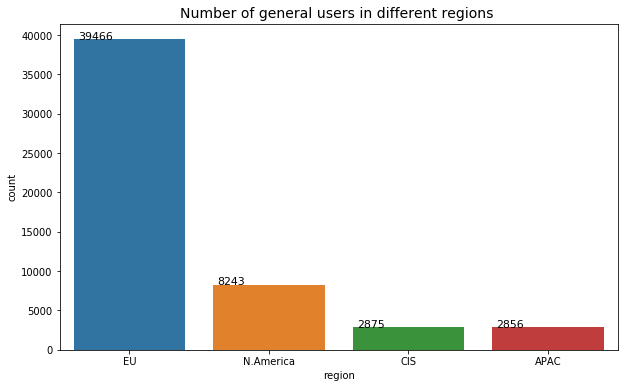

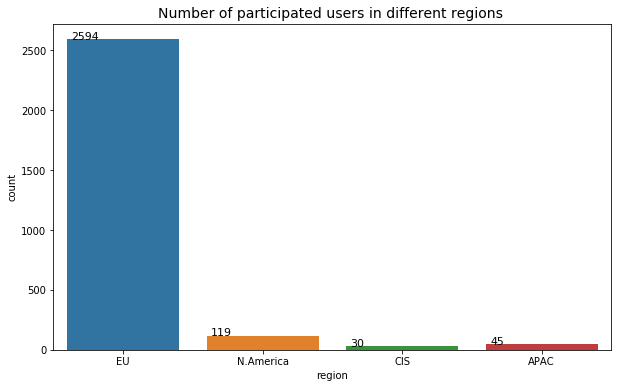

In [31]:
# To visualize the Number of users in different regions
plt.figure(figsize=(10,6))
plt.title('Number of general users in different regions ', fontsize=14)
r_order = ['EU','N.America','CIS','APAC']
ax=sns.countplot(x='region',data=user_data, order=r_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


# To visualize the Number of participated users in different regions
plt.figure(figsize=(10,6))
plt.title('Number of participated users in different regions ', fontsize=14)
r_order = ['EU','N.America','CIS','APAC']
ax=sns.countplot(x='region',data=filt_part_data, order=r_order)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()

In [32]:
#Observing the percentage of participants from different regions
print(filt_part_data['region'].value_counts(normalize=True))

EU           0.930416
N.America    0.042683
APAC         0.016141
CIS          0.010760
Name: region, dtype: float64


In [33]:
print(round(len(filt_part_data.query(' region == "EU" ')) / len(part_data) * 100 ,2 ) , "% users of total participants are from EU region and took recommender_system_test.")

17.86 % users of total participants are from EU region and took recommender_system_test.


In [34]:
# the reviewer's code:
print(round(len(filt_part_data.query(' region == "EU" ')) / len(user_data.query('region == "EU" and first_date < "2020-12-22"')) * 100 ,2 ) , "% users of total participants are from EU region and took recommender_system_test.")

6.57 % users of total participants are from EU region and took recommender_system_test.


In [35]:
# Finding number of frequency for each events for each group
event_exp_id= new_df.groupby(['event_name','group'])['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
event_exp_id.columns=['event_name','group','numbers']
display(event_exp_id)

,event_name,group,numbers
0,login,A,2082
4,product_page,A,1360
1,login,B,705
6,purchase,A,652
2,product_cart,A,631
5,product_page,B,397
7,purchase,B,198
3,product_cart,B,195


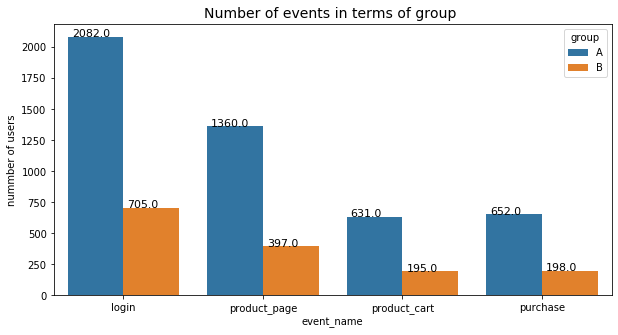

In [36]:
# plotting the number of the various types of establishments 
plt.figure(figsize=(10,5))
event_order=['login','product_page','product_cart','purchase']
ax = sns.barplot(x="event_name",y='numbers', hue='group', data=event_exp_id, order = event_order) 


plt.title('Number of events in terms of group ', size = 14)
plt.xlabel('event_name')
plt.ylabel('nummber of users')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


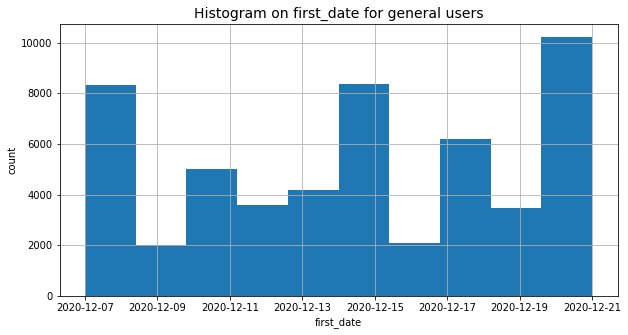

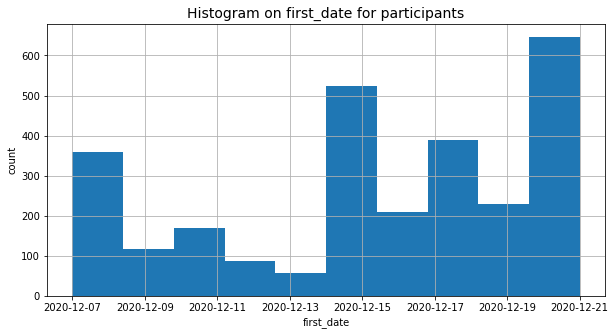

In [37]:
# Histogram for period of time to cover data
plt.figure(figsize=(10,5))
#fig, ax = plt.subplots()
user_data['first_date'].hist()

#fig.autofmt_xdate()
plt.title('Histogram on first_date for general users', size =14)
plt.xlabel('first_date')
plt.ylabel('count')
plt.show()

# Histogram for period of time to cover data for filt_part_data
plt.figure(figsize=(10,5))
#fig, ax = plt.subplots()
filt_part_data['first_date'].hist()

#fig.autofmt_xdate()
plt.title('Histogram on first_date for participants', size =14)
plt.xlabel('first_date')
plt.ylabel('count')
plt.show()

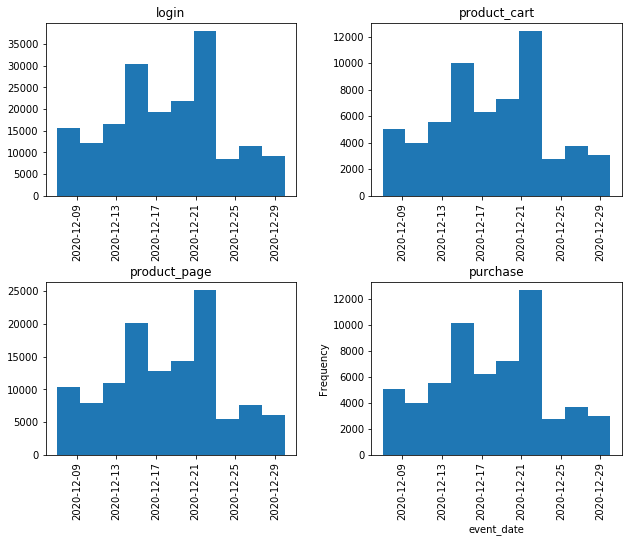

In [38]:
#Histogram for events for users in terms of date

event_data.hist(column='event_date', by='event_name', figsize=(10,8))
#plt.title('Histogram on frequency for event_date for general users', size =14)

plt.ylabel('Frequency')
plt.xlabel('event_date')
plt.show()

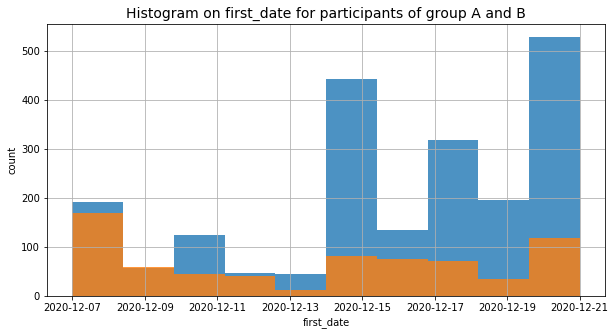

In [39]:
# Histogram for period of time to cover data for filt_part_data
plt.figure(figsize=(10,5))
#fig, ax = plt.subplots()
filt_part_data.query('group== "A" ')['first_date'].hist(alpha=0.8)
filt_part_data.query('group== "B" ')['first_date'].hist(alpha=0.8)

#fig.autofmt_xdate()
plt.title('Histogram on first_date for participants of group A and B', size =14)
plt.xlabel('first_date')
plt.ylabel('count')
plt.show()

Histogram for events for participants of group A in terms of date:


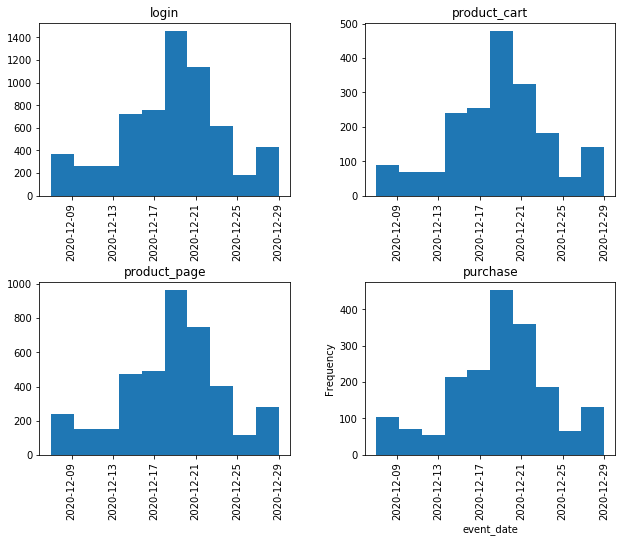



Histogram for events for participants of group B in terms of date:



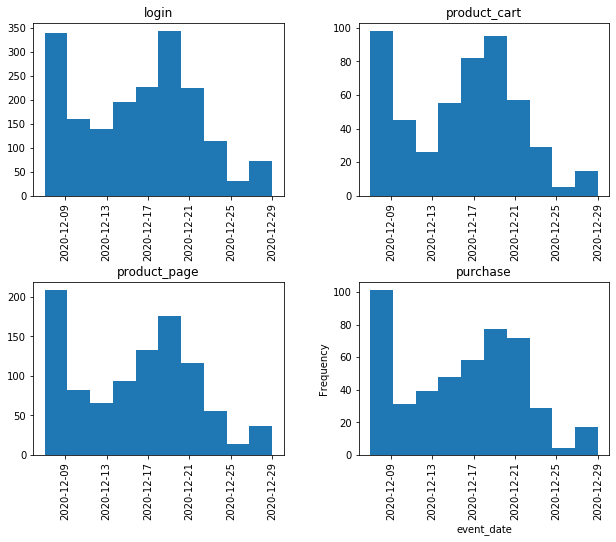

In [40]:
#Histogram for events for participants of group A in terms of date

#event_data.hist(column='event_date', by='event_name', figsize=(10,8))
#plt.title('Histogram for events for participants of group A in terms of date', size =14)

print("Histogram for events for participants of group A in terms of date:")

new_df.query('group== "A" ').hist(column='event_date', by='event_name', figsize=(10,8))

plt.ylabel('Frequency')
plt.xlabel('event_date')
plt.show()

print()
print()
print("Histogram for events for participants of group B in terms of date:")
print()

#Histogram for events for participants of group B in terms of date

#event_data.hist(column='event_date', by='event_name', figsize=(10,8))
#plt.title('Histogram on frequency for event_date for general users', size =14)

new_df.query('group== "B" ').hist(column='event_date', by='event_name', figsize=(10,8))

plt.ylabel('Frequency')
plt.xlabel('event_date')
plt.show()




In [41]:
# Finding the number of total events in each date for all users
date_events_number = event_data.groupby(['event_date'])['event_name'].count().to_frame()
date_events_number.columns = [' '.join(col).strip() for col in date_events_number.columns.values]
date_events_number  = date_events_number.reset_index()
date_events_number.columns = ['event_date','number_of_events']
date_events_number["event_date"]= date_events_number["event_date"].dt.date
display(date_events_number.head())

,event_date,number_of_events
0,2020-12-07,11385
1,2020-12-08,12547
2,2020-12-09,12122
3,2020-12-10,14077
4,2020-12-11,13864


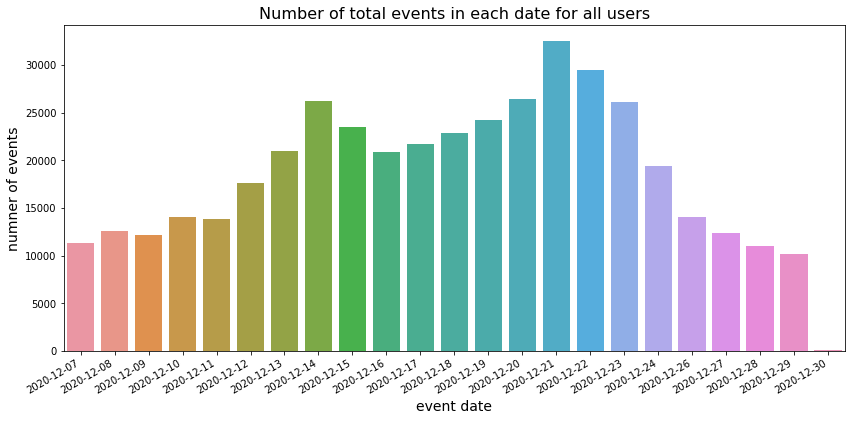

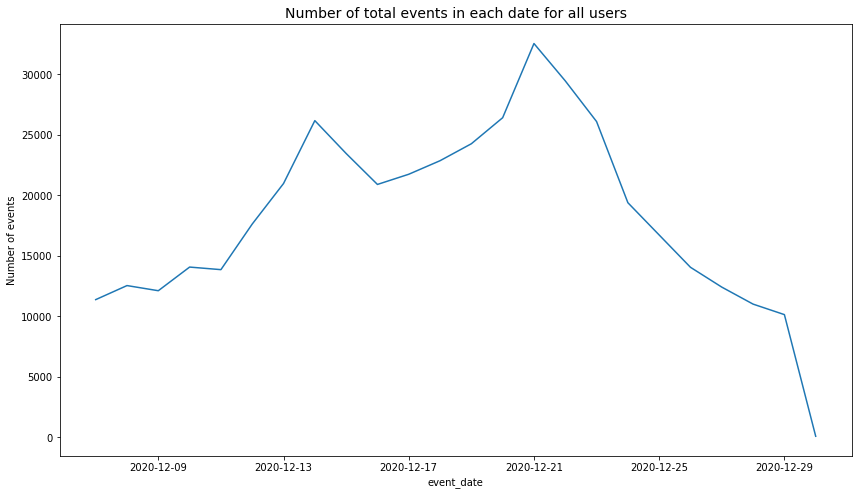

In [42]:
#Plotting graph for number of events in each event_date:

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=date_events_number, x='event_date', y='number_of_events', ax=ax)
# sns.countplot(data=log_data, x='event_date', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(np.arange(0,300,50))
#plt.tight_layout()
plt.title('Number of total events in each date for all users', fontsize=16)
plt.xlabel('event date', fontsize=14)
plt.ylabel('numner of events', fontsize=14);

# for i in ax.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


fig=plt.figure(figsize=(11,6))
ax=fig.add_axes([0,0,1,1])
ax.plot(date_events_number['event_date'],date_events_number['number_of_events'])
plt.title('Number of total events in each date for all users', size =14)
plt.xlabel('event_date')
plt.ylabel('Number of events')
plt.show()

In [43]:
# Finding the number of total events in each date for all users
date_events_number_testA = new_df.query(' group== "A" ').groupby(['event_date'])['event_name'].count().to_frame()
date_events_number_testA.columns = [' '.join(col).strip() for col in date_events_number_testA.columns.values]
date_events_number_testA  = date_events_number_testA.reset_index()
date_events_number_testA.columns = ['event_date','number_of_events']
date_events_number_testA["event_date"]= date_events_number_testA["event_date"].dt.date
display(date_events_number_testA.head())

,event_date,number_of_events
0,2020-12-07,234
1,2020-12-08,267
2,2020-12-09,296
3,2020-12-10,265
4,2020-12-11,282


In [44]:
# Finding the number of total events in each date for all users
date_events_number_testB = new_df.query(' group== "B" ').groupby(['event_date'])['event_name'].count().to_frame()
date_events_number_testB.columns = [' '.join(col).strip() for col in date_events_number_testB.columns.values]
date_events_number_testB  = date_events_number_testB.reset_index()
date_events_number_testB.columns = ['event_date','number_of_events']
date_events_number_testB["event_date"]= date_events_number_testB["event_date"].dt.date
display(date_events_number_testB.head())

,event_date,number_of_events
0,2020-12-07,290
1,2020-12-08,183
2,2020-12-09,273
3,2020-12-10,196
4,2020-12-11,122


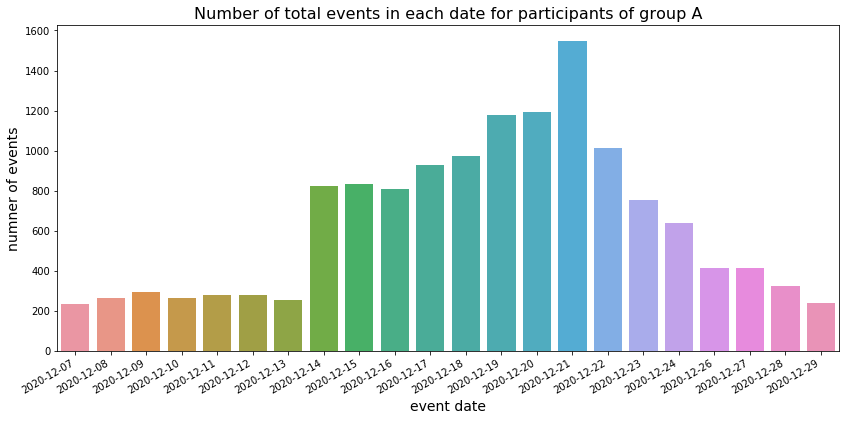

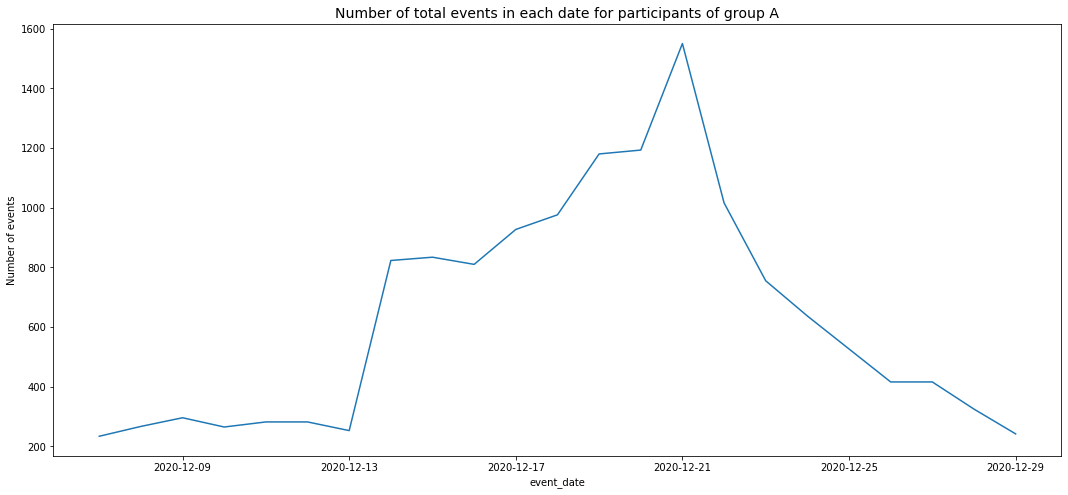

In [45]:
#Plotting graph for number of events in each event_date:

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=date_events_number_testA, x='event_date', y='number_of_events', ax=ax)
# sns.countplot(data=log_data, x='event_date', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(np.arange(0,300,50))
#plt.tight_layout()
plt.title('Number of total events in each date for participants of group A', fontsize=16)
plt.xlabel('event date', fontsize=14)
plt.ylabel('numner of events', fontsize=14);

# for i in ax.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


fig=plt.figure(figsize=(14,6))
ax=fig.add_axes([0,0,1,1])
ax.plot(date_events_number_testA['event_date'],date_events_number_testA['number_of_events'])
plt.title('Number of total events in each date for participants of group A', size =14)
plt.xlabel('event_date')
plt.ylabel('Number of events')
plt.show()

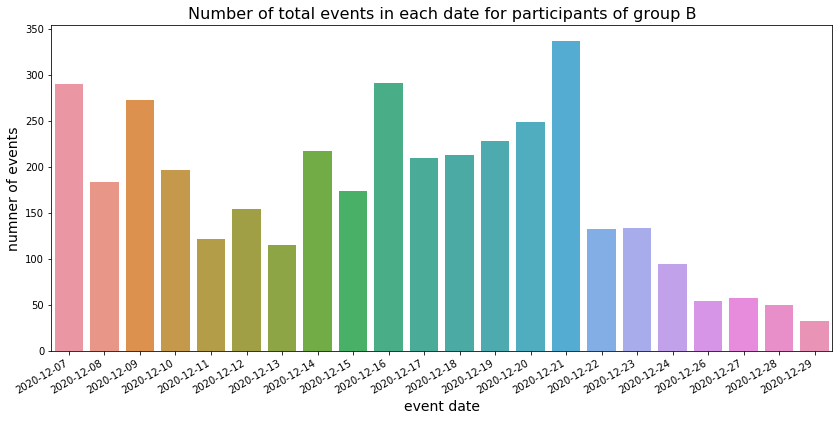

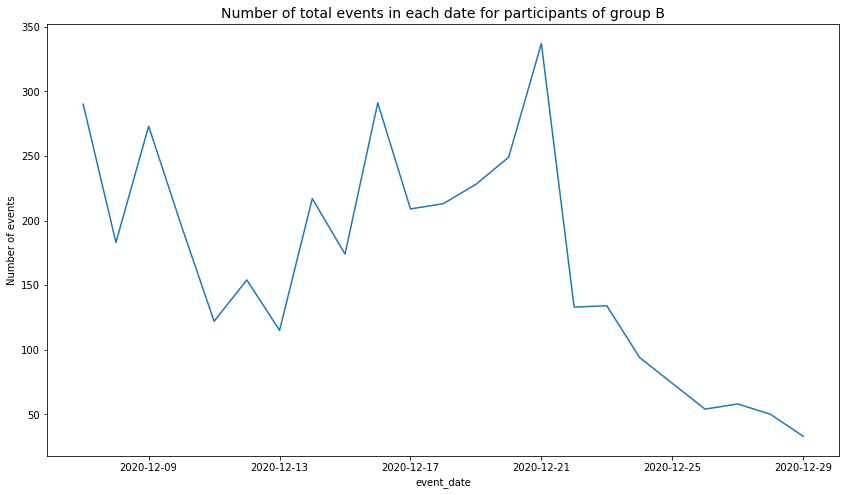

In [46]:
#Plotting graph for number of events in each event_date:

fig_dims = (14, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(data=date_events_number_testB, x='event_date', y='number_of_events', ax=ax)
# sns.countplot(data=log_data, x='event_date', ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
#plt.xticks(np.arange(0,300,50))
#plt.tight_layout()
plt.title('Number of total events in each date for participants of group B', fontsize=16)
plt.xlabel('event date', fontsize=14)
plt.ylabel('numner of events', fontsize=14);

# for i in ax.patches:
#     # get_x pulls left or right; get_height pushes up or down
#     ax.text(i.get_x()+.03, i.get_height()+1, str(round((i.get_height()), 2)), fontsize=11)
plt.show()


fig=plt.figure(figsize=(11,6))
ax=fig.add_axes([0,0,1,1])
ax.plot(date_events_number_testB['event_date'],date_events_number_testB['number_of_events'])
plt.title('Number of total events in each date for participants of group B', size =14)
plt.xlabel('event_date')
plt.ylabel('Number of events')
plt.show()

In [47]:
display(mark_data)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


**Finding events number by each user**

In [48]:
eventsByusers = event_data['user_id'].value_counts().to_frame().reset_index()
#eventsByusers = eventsByusers.to_frame()
#eventsByusers = eventsByusers.reset_index()
eventsByusers.columns = ['user_id', 'number']
display(eventsByusers.head())

,user_id,number
0,A3917F81482141F2,36
1,11285A53EC2B2042,32
2,BA87FD8D70D63CC6,32
3,426330B820B8711A,32
4,365C8B51237C61AF,32


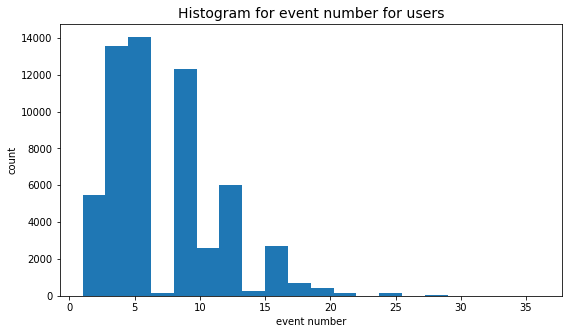

In [49]:
plt.figure(figsize=(9,5))
plt.hist(eventsByusers['number'],bins=20)
plt.title('Histogram for event number for users', size =14)
plt.xlabel('event number')
plt.ylabel('count')
plt.show()

In [50]:
eventsByusers_A = new_df.query(' group== "A" ')['user_id'].value_counts().to_frame().reset_index()
#eventsByusers_A = eventsByusers_A.to_frame()
#eventsByusers_A = eventsByusers_A.reset_index()
eventsByusers_A.columns = ['user_id', 'number']
display(eventsByusers_A.head())

,user_id,number
0,CED71698585A2E46,24
1,1BFEE479308EFF44,24
2,6E3DF9C69A6B607E,21
3,F9D53F0BA957F728,20
4,8378F834617AA310,20


In [51]:
eventsByusers_B = new_df.query(' group== "B" ')['user_id'].value_counts().to_frame().reset_index()
#eventsByusers_B = eventsByusers_B.to_frame()
#eventsByusers_B = eventsByusers_B.reset_index()
eventsByusers_B.columns = ['user_id', 'number']
display(eventsByusers_B.head())

,user_id,number
0,1198061F6AF34B7B,24
1,115EBC1CA027854A,24
2,89545C7F903DBA34,21
3,2C2BE85372033F77,20
4,7E8720DB6A21CF66,20


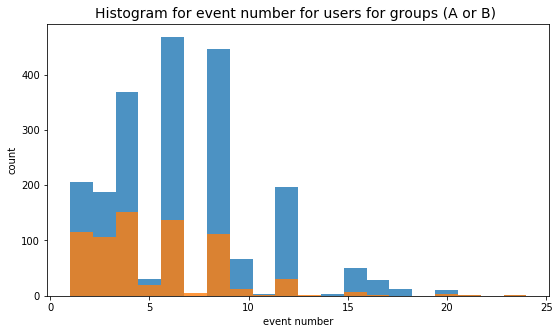

In [52]:
plt.figure(figsize=(9,5))
plt.hist(eventsByusers_A['number'],bins=20, alpha=0.8)
plt.hist(eventsByusers_B['number'],bins=20, alpha=0.8)
plt.title('Histogram for event number for users for groups (A or B) ', size =14)
plt.xlabel('event number')
plt.ylabel('count')
plt.show()

**Funnel plot for number of users for each events**

In [53]:
display(event_exp_id)

,event_name,group,numbers
0,login,A,2082
4,product_page,A,1360
1,login,B,705
6,purchase,A,652
2,product_cart,A,631
5,product_page,B,397
7,purchase,B,198
3,product_cart,B,195


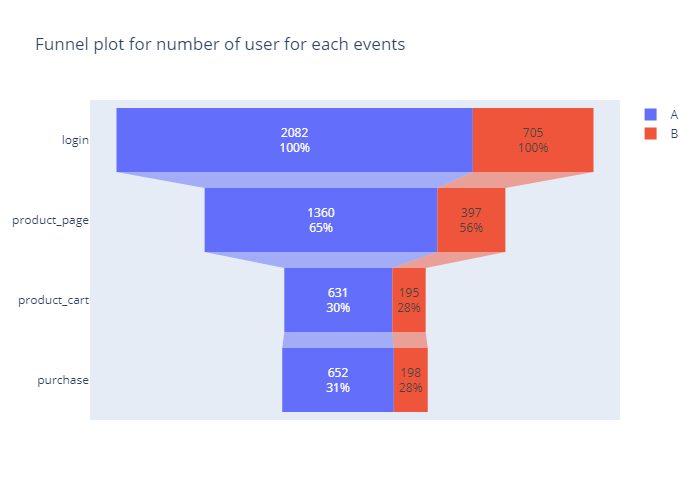

In [54]:
# Funnel plot for number of user for each events

#fig = px.funnel(event_exp_id, x='numbers', y='event_name', color='group', title = "Funnel plot for number of user for each events")
#fig.show()
#Alternative

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = ["login", "product_page", "product_cart", "purchase"],
    x = [2082,1360,631,652],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    orientation = "h",
    y = ["login", "product_page", "product_cart", "purchase"],
    x = [705,397,195,198],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.update_layout(title_text='Funnel plot for number of user for each events')
fig.show(renderer="png")

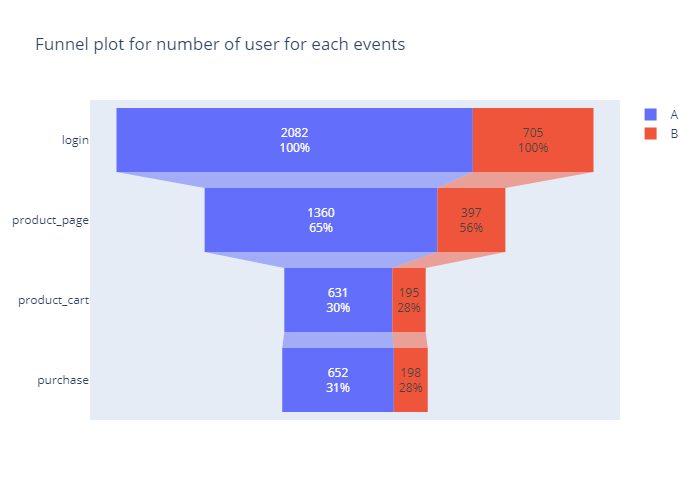

In [55]:
# the r's code:
event_exp_id = event_exp_id.reindex([0,1,4,5,2,3,6,7])
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = event_exp_id.query('group == "A"')["event_name"],
    x = event_exp_id.query('group == "A"')["numbers"],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = event_exp_id.query('group == "B"')["event_name"],
    x = event_exp_id.query('group == "B"')["numbers"],
    textinfo = "value+percent initial"))

fig.update_layout(title_text='Funnel plot for number of user for each events')
fig.show(renderer="png")

**Finding the number of users in each group**

In [56]:
exp_num_users = new_df.groupby('group')['user_id'].nunique()
exp_num_users = exp_num_users.reset_index()
exp_num_users.columns =['group','unique_users_num']
exp_num_users

,group,unique_users_num
0,A,2082
1,B,706


In our test data,  there are 2082 and 706 unique users for group A and B respectively.

**whether the groups were split properly:**

In [57]:
event_exp_num_users= new_df.pivot_table(index='event_name', values='user_id', columns='group', aggfunc=lambda x: x.nunique())
event_exp_num_users.columns = [' '.join(col).strip() for col in event_exp_num_users.columns.values]
event_exp_num_users= event_exp_num_users.reset_index()
event_exp_num_users

,event_name,A,B
0,login,2082,705
1,product_cart,631,195
2,product_page,1360,397
3,purchase,652,198


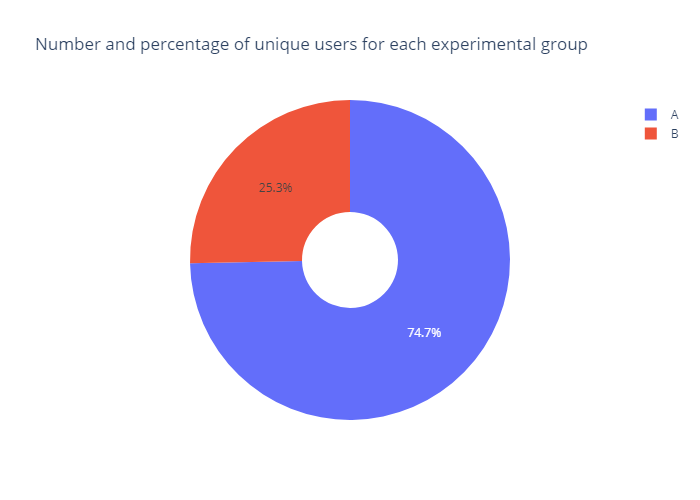

In [58]:
# We can have a look on the number of unique users for each experimental group
labels = exp_num_users['group']
values = exp_num_users['unique_users_num']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='Number and percentage of unique users for each experimental group')
fig.show(renderer="png")

<a id='the_destination4'></a>
### Testing Hypothesis and Study the results of the A/B Test

**Thinking of the possible details in the data that need to be taken into account before starting the A/B test:**

It is needed to 

- Identify the goal.
- Split sample groups equally and randomly.
- Determine sample size (if applicable).
- Decide how significant the results need to be.


- Make sure of only running one test at a time on any campaign.
- Test both variations simultaneously.
- Give the A/B test enough time to produce useful data.
- Ask for feedback from real users.


- Formulate  hypothesis correctly
- Not to ignore statistical significance
- Follow an iterative process
- Consider external factors


- Check the results as they should not be affected by anomalies or outliers in the statistical population
- Consider the number of users in different groups doesn't vary significantly
- Record data on the same event  for all groups and sent to analytical systems
- Make sure users remain within their groups until the end of the test.


**Formulation of hypothsis for  group A and B:**


- Null Hypothesis (H_0) : There is no statistically significant difference for group A and B.


- Alternative hypothesis (H_1) : There is a statistically significant difference for  group A and B.

**Critical statistical significance level**

At this point, we need to determine our critical statistical significance level.
The significance level, denoted as alpha, is the probability of rejecting the null hypothesis when p-value is less than alpha. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. 

- However in our case, critical statistical significance level, alpha = 0.05 

**Function for hypothesis testing**

In [59]:
# function for hypothesis testing.

# find statistical significance for each group for each event

def statistical_significance_test_func(group1, group2, alpha):


    for event in event_exp_num_users.event_name.unique():

        #alpha = .05 # significance level
        
        successes1 = event_exp_num_users[event_exp_num_users.event_name == event][group1].iloc[0]
        successes2 = event_exp_num_users[event_exp_num_users.event_name == event][group2].iloc[0]

        
        trials1 = new_df[new_df.group == group1]['user_id'].nunique()
        trials2 = new_df[new_df.group == group2]['user_id'].nunique()

        # success proportion in the first group:
        p1 = successes1 / trials1

        # success proportion in the second group:
        p2 = successes2 / trials2

        # success proportion in the combined dataset:
        p_combined = (successes1 + successes2) / (trials1 + trials2)

        # the difference between the datasets' proportions
        difference = p1 - p2
        
        # calculating the statistic in standard deviations of the standard normal distribution
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

        # setting up the standard normal distribution (mean 0, standard deviation 1)
        distr = stats.norm(0,1)

        # calculate p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p_value: ', p_value)
        
        if (p_value < alpha):
            print("We reject the null hypothesis. There is a significant difference between the proportions for for the event:",event, "of control groups",group1, "and", group2 ,".")
            print()
        else:
            print("We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event:", event,"of control groups",group1, "and", group2 , ".")
            print()


In [60]:
statistical_significance_test_func("A", "B", 0.05)

p_value:  0.08587401754779211
We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event: login of control groups A and B .

p_value:  0.1766337419130104
We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event: product_cart of control groups A and B .

p_value:  1.5371909704686715e-05
We reject the null hypothesis. There is a significant difference between the proportions for for the event: product_page of control groups A and B .

p_value:  0.10281767567786759
We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event: purchase of control groups A and B .



**Number of statistical hypothesis tests that were carried out, required significance level , Bonferroni procedure (correction):**

The same function written above can be implemented for the Bonferroni procedure.

In [61]:
# function for hypothesis testing.

# find statistical significance for each group for each event

def statistical_significance_test_func(group1, group2, alpha):


    for event in event_exp_num_users.event_name.unique():

        #alpha = .05 # significance level
        #bonferroni_alpha = alpha / 15  # 2*4 = 8 comparisons made
        
        successes1 = event_exp_num_users[event_exp_num_users.event_name == event][group1].iloc[0]
        successes2 = event_exp_num_users[event_exp_num_users.event_name == event][group2].iloc[0]

        
        trials1 = new_df[new_df.group == group1]['user_id'].nunique()
        trials2 = new_df[new_df.group == group2]['user_id'].nunique()

        # success proportion in the first group:
        p1 = successes1 / trials1

        # success proportion in the second group:
        p2 = successes2 / trials2

        # success proportion in the combined dataset:
        p_combined = (successes1 + successes2) / (trials1 + trials2)

        # the difference between the datasets' proportions
        difference = p1 - p2
        
        # calculating the statistic in standard deviations of the standard normal distribution
        z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

        # setting up the standard normal distribution (mean 0, standard deviation 1)
        distr = stats.norm(0,1)

        # calculate p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p_value: ', p_value)
        
        if (p_value < alpha):
            print("We reject the null hypothesis. There is a significant difference between the proportions for for the event:",event, "of control groups",group1, "and", group2 ,".")
            print()
        else:
            print("We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event:", event,"of control groups",group1, "and", group2 , ".")
            print()


In [62]:
# required significance level, alpha = 0.05;  Number of comparison = 2*4 = 8 
bonferroni_alpha = 0.05 / 8  
print('bonferroni_alpha:', bonferroni_alpha)

bonferroni_alpha: 0.00625


In [63]:
statistical_significance_test_func("A", "B", 0.00625) # bonferroni_alpha has been applied

p_value:  0.08587401754779211
We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event: login of control groups A and B .

p_value:  0.1766337419130104
We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event: product_cart of control groups A and B .

p_value:  1.5371909704686715e-05
We reject the null hypothesis. There is a significant difference between the proportions for for the event: product_page of control groups A and B .

p_value:  0.10281767567786759
We can't reject the null hypothesis. There is no reason to consider the proportions are different for the event: purchase of control groups A and B .



In [64]:
#Finding the cumulative details/revenue for group A in terms of date

date_details_cum_A = new_df.query(' group=="A" and event_name =="purchase" ')
date_details_cum_A.event_date = pd.to_datetime(date_details_cum_A.event_date)
date_details_cum_A =date_details_cum_A.groupby('event_date').details.sum()
date_details_cum_A  = date_details_cum_A .groupby(date_details_cum_A .index.month).cumsum().reset_index()
date_details_cum_A.columns=['event_date', 'details_cum']
display(date_details_cum_A.head())

,event_date,details_cum
0,2020-12-07,744.70
1,2020-12-08,1479.40
2,2020-12-09,2803.97
3,2020-12-10,3993.59
4,2020-12-11,4953.26


In [65]:
#Finding the cumulative details/revenue for group B in terms of date

date_details_cum_B = new_df.query(' group=="B" and event_name =="purchase" ')
date_details_cum_B.event_date = pd.to_datetime(date_details_cum_B.event_date)
date_details_cum_B =date_details_cum_B.groupby('event_date').details.sum()
date_details_cum_B  = date_details_cum_B .groupby(date_details_cum_B .index.month).cumsum().reset_index()
date_details_cum_B.columns=['event_date', 'details_cum']
display(date_details_cum_B.head())

,event_date,details_cum
0,2020-12-07,639.53
1,2020-12-08,984.27
2,2020-12-09,1338.99
3,2020-12-10,1948.79
4,2020-12-11,2018.68


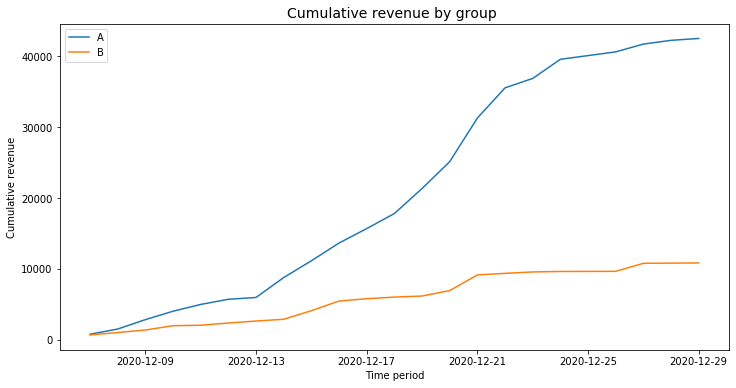

In [66]:
# Plotting Cumulative revenue by group

plt.figure(figsize=(12, 6))
# Plotting the group A revenue graph 
plt.plot(date_details_cum_A['event_date'], date_details_cum_A['details_cum'], label='A')

# Plotting the group B revenue graph 
plt.plot(date_details_cum_B['event_date'], date_details_cum_B['details_cum'], label='B')

plt.title('Cumulative revenue by group ', size =14)
plt.xlabel('Time period')
plt.ylabel('Cumulative revenue')

plt.legend()
plt.show()

In [67]:
# Finding the number of each events in each date
date_test_group_A = new_df.query('group == "A" ').groupby(['event_date','event_name' ])['event_name'].count().to_frame()
date_test_group_A.columns = [' '.join(col).strip() for col in date_test_group_A.columns.values]
date_test_group_A  = date_test_group_A.reset_index()
date_test_group_A.columns = ['event_date', 'event_name', 'number_of_events']
#display(date_test_group_A.head())

In [68]:
# changing the view of above data frame of the number of each events in each date
date_wise_events_A = date_test_group_A.set_index(['event_date','event_name'])['number_of_events'].unstack()
date_wise_events_A.columns = [' '.join(col).strip() for col in date_wise_events_A.columns.values]
date_wise_events_A  = date_wise_events_A.reset_index()
date_wise_events_A.columns = ['event_date', 'login', 'product_cart','product_page','purchase']
#display(date_wise_events_A.head())

In [69]:
# Finding the cumulative sum of number of all events for each date
date_wise_events_A['login_cum']=date_wise_events_A['login'].cumsum()
date_wise_events_A['pro_cart_cum']=date_wise_events_A['product_cart'].cumsum()
date_wise_events_A['pro_page_cum']=date_wise_events_A['product_page'].cumsum()
date_wise_events_A['purchase_cum']=date_wise_events_A['purchase'].cumsum()
display(date_wise_events_A.head())

,event_date,login,product_cart,product_page,purchase,login_cum,pro_cart_cum,pro_page_cum,purchase_cum
0,2020-12-07,109,25,70,30,109,25,70,30
1,2020-12-08,121,30,86,30,230,55,156,60
2,2020-12-09,135,35,83,43,365,90,239,103
3,2020-12-10,122,33,72,38,487,123,311,141
4,2020-12-11,137,35,77,33,624,158,388,174


In [70]:
# Finding the number of each events in each date
date_test_group_B = new_df.query('group == "B" ').groupby(['event_date','event_name' ])['event_name'].count().to_frame()
date_test_group_B.columns = [' '.join(col).strip() for col in date_test_group_B.columns.values]
date_test_group_B  = date_test_group_B.reset_index()
date_test_group_B.columns = ['event_date', 'event_name', 'number_of_events']
#display(date_test_group_B)

In [71]:
# changing the view of above data frame of the number of each events in each date
date_wise_events_B = date_test_group_B.set_index(['event_date','event_name'])['number_of_events'].unstack()
date_wise_events_B.columns = [' '.join(col).strip() for col in date_wise_events_B.columns.values]
date_wise_events_B  = date_wise_events_B.reset_index()
date_wise_events_B.columns = ['event_date', 'login', 'product_cart','product_page','purchase']
#display(date_wise_events_B)

In [72]:
# Finding the cumulative sum of number of all events for each date
date_wise_events_B['login_cum']=date_wise_events_B['login'].cumsum()
date_wise_events_B['pro_cart_cum']=date_wise_events_B['product_cart'].cumsum()
date_wise_events_B['pro_page_cum']=date_wise_events_B['product_page'].cumsum()
date_wise_events_B['purchase_cum']=date_wise_events_B['purchase'].cumsum()
display(date_wise_events_B.head())

,event_date,login,product_cart,product_page,purchase,login_cum,pro_cart_cum,pro_page_cum,purchase_cum
0,2020-12-07,124,36,83,47,124,36,83,47
1,2020-12-08,87,26,44,26,211,62,127,73
2,2020-12-09,128,36,81,28,339,98,208,101
3,2020-12-10,96,29,51,20,435,127,259,121
4,2020-12-11,64,16,31,11,499,143,290,132


In [73]:
merged_date_wise_events = date_wise_events_A.merge(date_wise_events_B, left_on='event_date', right_on='event_date', how='left', suffixes=['A', 'B'])
display(merged_date_wise_events.head())

,event_date,loginA,product_cartA,product_pageA,purchaseA,login_cumA,pro_cart_cumA,pro_page_cumA,purchase_cumA,loginB,product_cartB,product_pageB,purchaseB,login_cumB,pro_cart_cumB,pro_page_cumB,purchase_cumB
0,2020-12-07,109,25,70,30,109,25,70,30,124,36,83,47,124,36,83,47
1,2020-12-08,121,30,86,30,230,55,156,60,87,26,44,26,211,62,127,73
2,2020-12-09,135,35,83,43,365,90,239,103,128,36,81,28,339,98,208,101
3,2020-12-10,122,33,72,38,487,123,311,141,96,29,51,20,435,127,259,121
4,2020-12-11,137,35,77,33,624,158,388,174,64,16,31,11,499,143,290,132


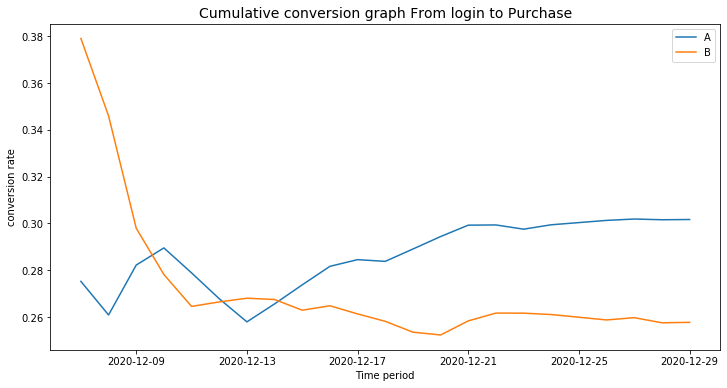

In [74]:
# calculating cumulative conversion

date_wise_events_A['conversion'] = date_wise_events_A['purchase_cum']/date_wise_events_A['login_cum']
date_wise_events_B['conversion'] = date_wise_events_B['purchase_cum']/date_wise_events_B['login_cum']



# plotting the graphs
plt.figure(figsize=(12,6))
plt.plot(date_wise_events_A['event_date'], date_wise_events_A['conversion'], label='A')
plt.plot(date_wise_events_B['event_date'], date_wise_events_B['conversion'], label='B')

# setting the axes' scale
#plt.axis(['2020-12-09', '2020-12-29', 0, 0.1]) 

plt.title('Cumulative conversion graph From login to Purchase', size =14)
plt.xlabel('Time period')
plt.ylabel('conversion rate')

plt.legend()
plt.show()

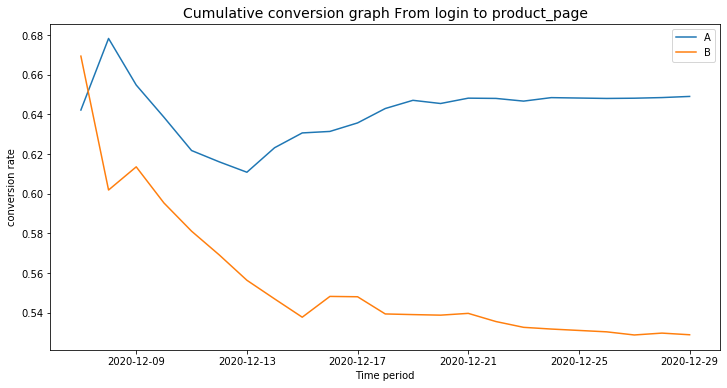

In [75]:
# calculating cumulative conversion
date_wise_events_A['conversion'] = date_wise_events_A['pro_page_cum']/date_wise_events_A['login_cum']
date_wise_events_B['conversion'] = date_wise_events_B['pro_page_cum']/date_wise_events_B['login_cum']



# plotting the graphs
plt.figure(figsize=(12,6))
plt.plot(date_wise_events_A['event_date'], date_wise_events_A['conversion'], label='A')
plt.plot(date_wise_events_B['event_date'], date_wise_events_B['conversion'], label='B')


plt.title('Cumulative conversion graph From login to product_page', size =14)
plt.xlabel('Time period')
plt.ylabel('conversion rate')

plt.legend()
plt.show()

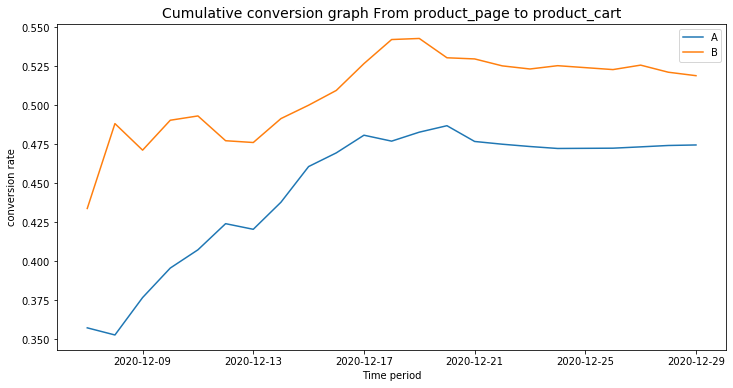

In [76]:
# calculating cumulative conversion
date_wise_events_A['conversion'] = date_wise_events_A['pro_cart_cum']/date_wise_events_A['pro_page_cum']
date_wise_events_B['conversion'] = date_wise_events_B['pro_cart_cum']/date_wise_events_B['pro_page_cum']



# plotting the graphs
plt.figure(figsize=(12,6))
plt.plot(date_wise_events_A['event_date'], date_wise_events_A['conversion'], label='A')
plt.plot(date_wise_events_B['event_date'], date_wise_events_B['conversion'], label='B')


plt.title('Cumulative conversion graph From product_page to product_cart', size =14)
plt.xlabel('Time period')
plt.ylabel('conversion rate')

plt.legend()
plt.show()

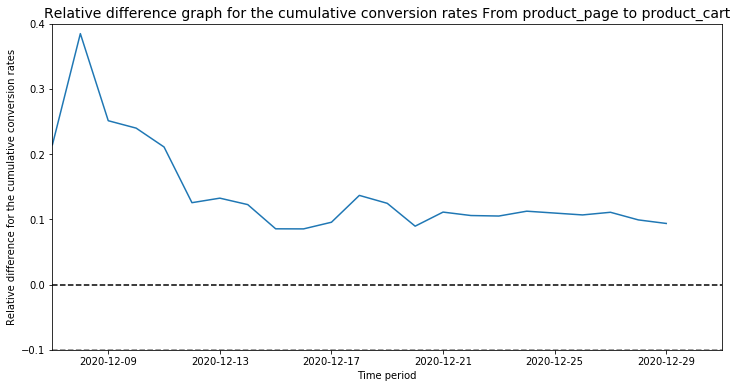

In [77]:
# Relative difference graph for the cumulative conversion rates
plt.figure(figsize=(12,6))

plt.plot(merged_date_wise_events['event_date'], (merged_date_wise_events['pro_cart_cumB']/merged_date_wise_events['pro_page_cumB'])/(merged_date_wise_events['pro_cart_cumA']/merged_date_wise_events['pro_page_cumA'])-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2020-12-07", '2020-12-31', -.1, .4])

plt.title('Relative difference graph for the cumulative conversion rates From product_page to product_cart', size =14)
plt.xlabel('Time period')
plt.ylabel('Relative difference for the cumulative conversion rates')

plt.show()


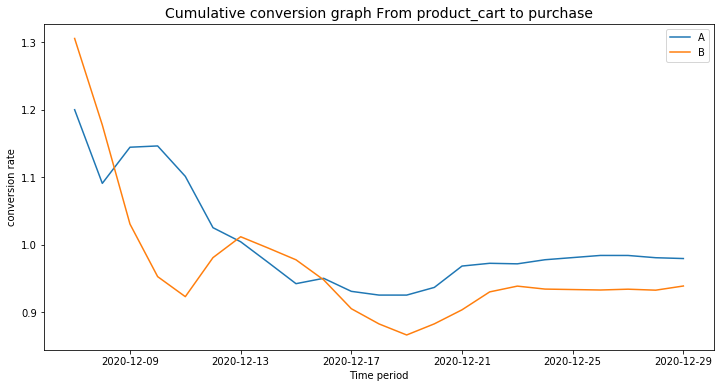

In [78]:
# calculating cumulative conversion
date_wise_events_A['conversion'] = date_wise_events_A['purchase_cum']/date_wise_events_A['pro_cart_cum']
date_wise_events_B['conversion'] = date_wise_events_B['purchase_cum']/date_wise_events_B['pro_cart_cum']



# plotting the graphs
plt.figure(figsize=(12,6))
plt.plot(date_wise_events_A['event_date'], date_wise_events_A['conversion'], label='A')
plt.plot(date_wise_events_B['event_date'], date_wise_events_B['conversion'], label='B')


plt.title('Cumulative conversion graph From product_cart to purchase', size =14)
plt.xlabel('Time period')
plt.ylabel('conversion rate')

plt.legend()
plt.show()

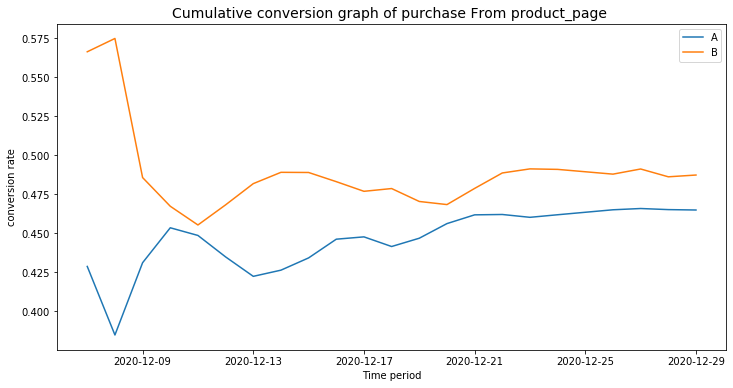

In [79]:
# calculating cumulative conversion
date_wise_events_A['conversion'] = date_wise_events_A['purchase_cum']/date_wise_events_A['pro_page_cum']
date_wise_events_B['conversion'] = date_wise_events_B['purchase_cum']/date_wise_events_B['pro_page_cum']



# plotting the graphs
plt.figure(figsize=(12,6))
plt.plot(date_wise_events_A['event_date'], date_wise_events_A['conversion'], label='A')
plt.plot(date_wise_events_B['event_date'], date_wise_events_B['conversion'], label='B')


plt.title('Cumulative conversion graph of purchase From product_page ', size =14)
plt.xlabel('Time period')
plt.ylabel('conversion rate')

plt.legend()
plt.show()

<div class="alert alert-info"> 
<b>Remark:</b> 
I would like to state that due to special reasons, neither all the comments nor the report of the analysis were added with this part of the project. Therefore, there is no reason to consider this version as complete though this is the important and core part of the project.  
    
                                      Thank you very much for your scrutiny and time.
   
</div>